In [ ]:
# AnythingDepth import
!pip install --upgrade timm -q

from mpl_toolkits.axes_grid1 import make_axes_locatable
from transformers import (
    AutoImageProcessor,
    AutoModelForDepthEstimation
)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.5 MB/s eta 0:00:00


In [5]:

import os
import cv2
import torch
import pandas
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# Install SCARED Toolkit
# !git clone https://github.com/dimitrisps/scared-toolkit.git


Cloning into 'scared-toolkit'...
fatal: could not read Username for 'https://github.com': No such device or address


In [6]:
# Video RGB PROYECTO_ENDOSCOPIA/train/dataset_1/keyframe_1/data/rgb.mp4
from google.colab import drive
drive.mount("/content/drive/")


# Obtener archivo mp4 '/content/drive/MyDrive/Colab Notebooks/Semillero/PROYECTO_ENDOSCOPIA/train/dataset_1/keyframe_1/data/rgb.mp4'
video_path = '/content/drive/MyDrive/Colab Notebooks/Semillero/PROYECTO_ENDOSCOPIA/train/dataset_1/keyframe_1/data/rgb.mp4'


Mounted at /content/drive/


In [ ]:
import cv2
import os
import sys

def extract_and_split_frames(input_path, out_dir, img_ext='png'):
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"Error: cannot open video '{input_path}'")
        return

    width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    half_h = height // 2

    left_dir  = os.path.join(out_dir, 'left')
    right_dir = os.path.join(out_dir, 'right')
    os.makedirs(left_dir, exist_ok=True)
    os.makedirs(right_dir, exist_ok=True)

    frame_idx = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        top    = frame[0:half_h,      0:width]
        bottom = frame[half_h:height, 0:width]

        left_path  = os.path.join(left_dir,  f"frame_{frame_idx:05d}.{img_ext}")
        right_path = os.path.join(right_dir, f"frame_{frame_idx:05d}.{img_ext}")

        cv2.imwrite(left_path,  top)
        cv2.imwrite(right_path, bottom)

        frame_idx += 1

    cap.release()
    print(f"Done. Extracted {frame_idx} frames to '{left_dir}' and '{right_dir}'.")

In [ ]:
# Ouput Split Frames Output
path = "/content/output_frame" #Se puede cambiar el path para descargar los frames en el drive de cada uno de los dataset y keyframes
extract_and_split_frames(video_path, "/content/output_frames", "png")

Done. Extracted 197 frames to '/content/output_frames/left' and '/content/output_frames/right'.


In [ ]:
# Usando AnydthingDepth
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

image_processor = AutoImageProcessor.from_pretrained(
    "LiheYoung/depth-anything-small-hf"
)
model = AutoModelForDepthEstimation.from_pretrained("LiheYoung/depth-anything-small-hf")

image = Image.open("/content/output_frames/left/frame_00000.png")

inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)

post_processed_output = image_processor.post_process_depth_estimation(
    outputs,
    target_sizes=[(image.height, image.width)],
)

predicted_depth_da1 = post_processed_output[0]["predicted_depth"]


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/437 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/954 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/99.2M [00:00<?, ?B/s]

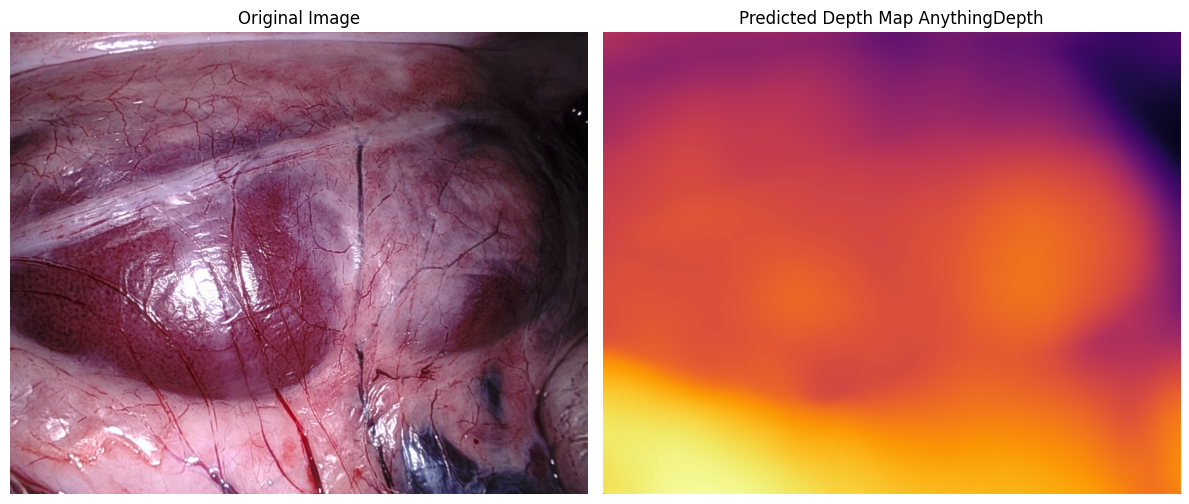

In [ ]:


# Convert the predicted depth to a NumPy array
depth = predicted_depth_da1.squeeze().cpu().numpy()

# Normalize the depth map for better visualization
depth_normalized = (depth - depth.min()) / (depth.max() - depth.min())

# Plot side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Depth map
plt.subplot(1, 2, 2)
plt.imshow(depth_normalized, cmap='inferno')
plt.title("Predicted Depth Map AnythingDepth")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
%%capture
!pip install opencv-python scikit-image tensorboard matplotlib tqdm timm==0.5.4

In [7]:

!git clone https://github.com/gangweiX/IGEV.git

Cloning into 'IGEV'...
remote: Enumerating objects: 375, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 375 (delta 123), reused 80 (delta 80), pack-reused 229 (from 2)
Receiving objects: 100% (375/375), 50.90 MiB | 44.32 MiB/s, done.
Resolving deltas: 100% (184/184), done.


In [ ]:
!pip install -q gdown
import gdown

In [4]:
# Descargando el archivo kitti15.pth. Kitti15 is the pretrained weights with KITTI dataset.
file_id = "1VG47N7gPzkg-FIhge0XHtlOVHDVmMdek"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output="/content/kitti15.pth", quiet=False)

NameError: name 'gdown' is not defined

In [ ]:
url = "/content/drive/MyDrive/Colab Notebooks/Semillero/PROYECTO_ENDOSCOPIA"
left_img = f"{url}/frame_00000_rectified_left.png"
right_img = f"{url}/frame_00000_rectified_right.png"
output_dir = "/content/IGEV/IGEV-Stereo/prueba_endoscopia"

!python demo_imgs.py --restore_ckpt '/content/kitti15.pth' -l="{left_img}" -r="{right_img}" --output_directory="{output_dir}"

Found 0 images. Saving files to {output_dir/depth_recitifed_images.png}/
0it [00:00, ?it/s]


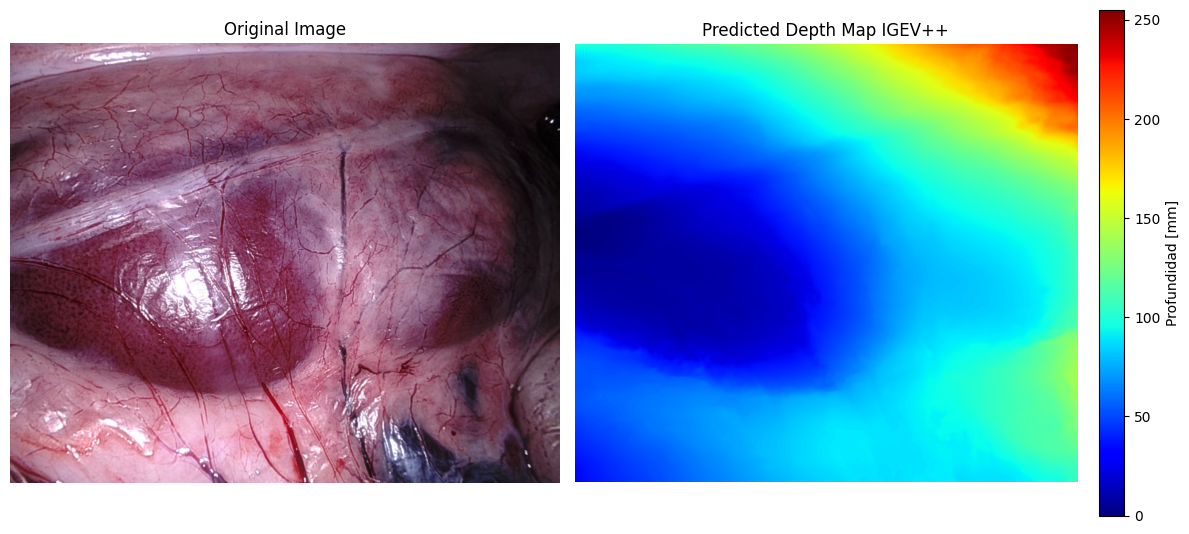

In [ ]:
# Cuantos milimetros esta la camara del objetivo Preguntar!!
DepthRecitifiedImages = cv2.imread(f"{output_dir}/PROYECTO_ENDOSCOPIA.png", cv2.IMREAD_UNCHANGED)

plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Depth map
plt.subplot(1, 2, 2)
img_plot = plt.imshow(DepthRecitifiedImages, cmap='jet')
plt.title("Predicted Depth Map IGEV++")
plt.axis("off")

# Añadir barra de color
cbar = plt.colorbar(img_plot, fraction=0.046, pad=0.04)
cbar.set_label("Profundidad [mm]")

plt.tight_layout()
plt.show()

In [ ]:
import os
import glob

base_train_dir = '/content/SOLORGB/train'
output_base_dir = '/content/IGEV/IGEV-Stereo/kitti_stereo'

for scene in os.listdir(base_train_dir):
    scene_path = os.path.join(base_train_dir, scene)

    # Check if the current item is a directory (scene)
    if os.path.isdir(scene_path):
        left_images = f'{scene_path}/RGB/Left/*.png' #/content/SOLORGB/train/2011_09_26_drive_0001/RGB/Left/*.png'
        right_images = f'{scene_path}/RGB/Right/*.png'

        output_dir = os.path.join(output_base_dir, scene)
        os.makedirs(output_dir, exist_ok=True)

        # Command to run the demo_imgs.py script
        command = f"python demo_imgs.py --restore_ckpt '/content/kitti15.pth' -l='{left_images}' -r='{right_images}' --output_directory '{output_dir}'"
        print(f"Executing: {command}")

        # Run the command
        os.system(command)

In [ ]:
import shutil
import os
from zipfile import ZipFile

folders_to_zip = '/content/IGEV/IGEV-Stereo/kitti_stereo'
output_filename = '/content/stereo_depth_kitti_scenes_uint16.zip'  # The output zip file

# Create a ZipFile object
with ZipFile(output_filename, 'w') as zipf:
    # Walk through all files and directories within the folder
    for root, dirs, files in os.walk(folders_to_zip):
        for file in files:
            file_path = os.path.join(root, file)
            # Write each file to the zip archive with a relative path
            zipf.write(file_path, os.path.relpath(file_path, folders_to_zip))

print(f"Folder '{folders_to_zip}' has been zipped as '{output_filename}'.")

# After zipping, you can download the zip file using the 'files' module in Google Colab
from google.colab import files
files.download(output_filename)